In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from ModelFunctions import DecisionTreeFunc, KnnFunc, BayesianRidgeFunc, NeuralNetworkFunc, LinearRegFunc
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')




In [2]:
features = pd.read_csv('data/mixed_prepared_features.csv')
features = features.drop(features.columns[0], axis=1)


train = features[features['Season'] != 2018]
test = features[features['Season'] == 2018]

train_features = train.drop(columns =['score_dif', 'Season']).values
train_outcome = train['score_dif'].values
test_features = test.drop(columns =['score_dif', 'Season']).values
test_outcome = test['score_dif'].values


In [3]:
DPred = DecisionTreeFunc(train_features, train_outcome).predict(test_features)
KPred = KnnFunc(train_features, train_outcome).predict(test_features)
NPred = NeuralNetworkFunc(train_features, train_outcome).predict(test_features)
BPred = BayesianRidgeFunc(train_features, train_outcome).predict(test_features)
LPred = LinearRegFunc(train_features, train_outcome).predict(test_features)

In [4]:
data = {'Actual': test_outcome, 'DPred' : DPred, 'KPred': KPred, 'NPred': NPred, 'BPred': BPred, 'LPred': LPred}
preds = pd.DataFrame(data=data)

preds.to_csv('data/model_predictions.csv')

In [5]:
whole = {}

data = {'Actual': test_outcome, 'Pred' : BPred}
comp = pd.DataFrame(data=data)
whole['BayesianRidge'] = [len(comp[comp['Actual']*comp['Pred'] >= 0])/len(comp)]

data = {'Actual': test_outcome, 'Pred' : KPred}
comp = pd.DataFrame(data=data)
whole['KNeighbors'] = [len(comp[comp['Actual']*comp['Pred'] >= 0])/len(comp)]

data = {'Actual': test_outcome, 'Pred' : LPred}
comp = pd.DataFrame(data=data)
whole['Linear'] = [len(comp[comp['Actual']*comp['Pred'] >= 0])/len(comp)]

data = {'Actual': test_outcome, 'Pred' : NPred}
comp = pd.DataFrame(data=data)
whole['NeuralNetwork'] = [len(comp[comp['Actual']*comp['Pred'] >= 0])/len(comp)]

data = {'Actual': test_outcome, 'Pred' : DPred}
comp = pd.DataFrame(data=data)
whole['DecisionTree'] = [len(comp[comp['Actual']*comp['Pred'] >= 0])/len(comp)]

accuracy = pd.DataFrame(data=whole)
accuracy.to_csv('data/model_accuracy_scores.csv')

# Visuals for Predictions

In [6]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

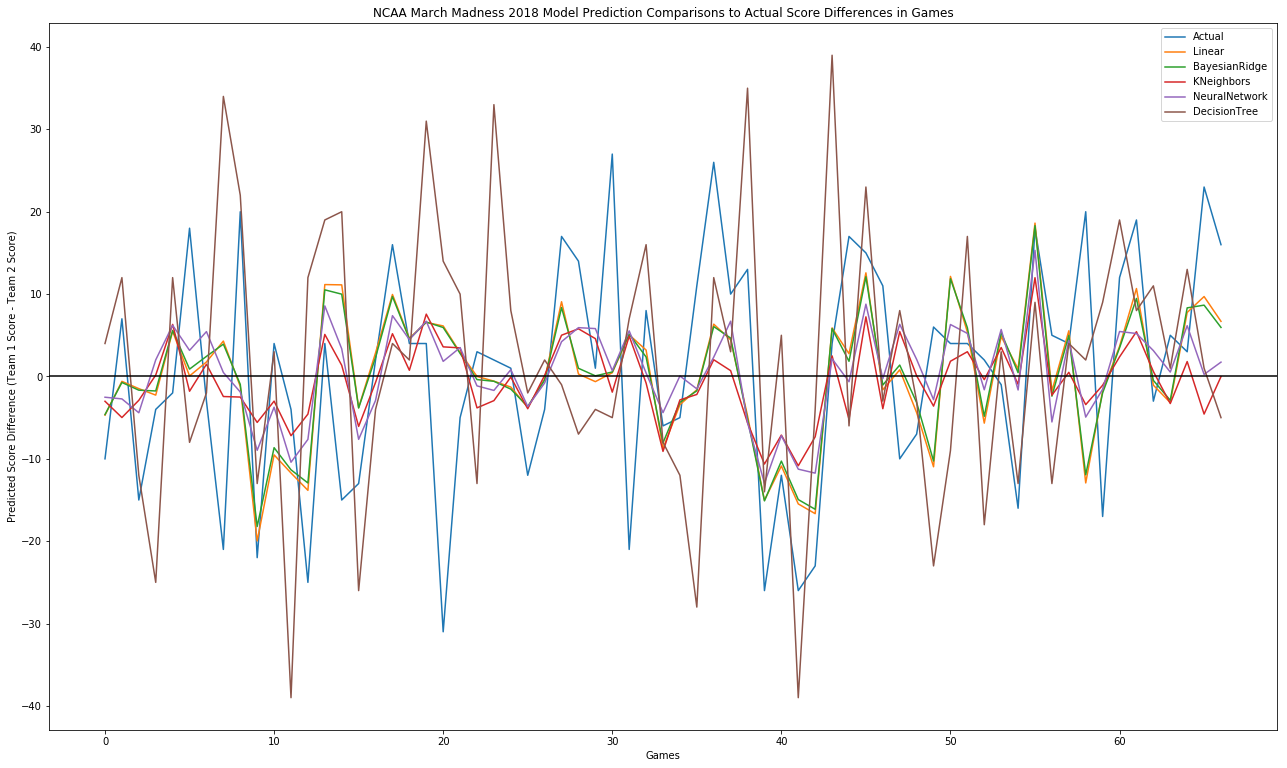

In [12]:
predDf = pd.read_csv('data/model_predictions.csv', index_col=[0])

plt.figure(figsize = [22, 13])

# plot sj
predDf['Actual'].plot(label="Actual")
predDf['LPred'].plot(label="Linear")
predDf['BPred'].plot(label="BayesianRidge")
predDf['KPred'].plot(label="KNeighbors")
predDf['NPred'].plot(label="NeuralNetwork")
predDf['DPred'].plot(label="DecisionTree")

plt.title("NCAA March Madness 2018 Model Prediction Comparisons to Actual Score Differences in Games")
plt.xlabel('Games')
plt.ylabel('Predicted Score Difference (Team 1 Score - Team 2 Score)')
plt.legend()
plt.axhline(0, color='black')
plt.show()


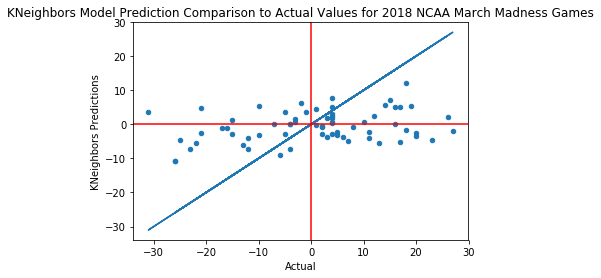

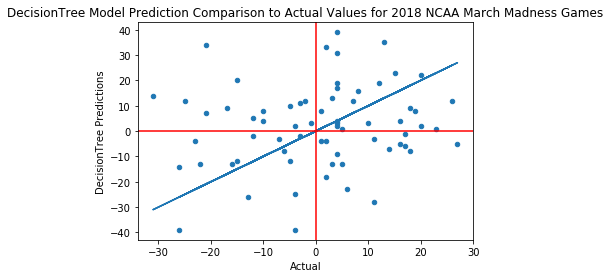

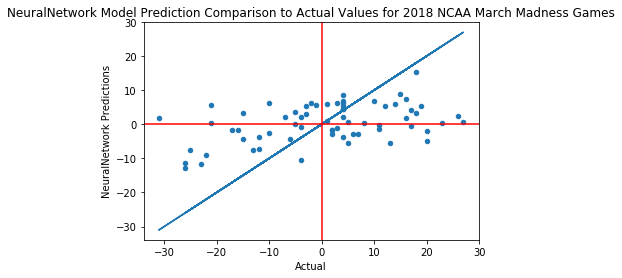

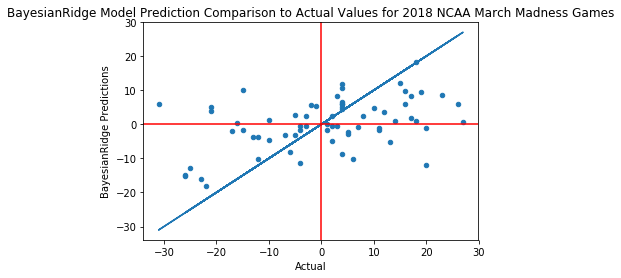

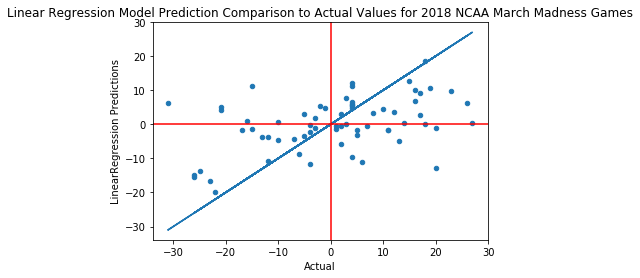

In [29]:
predDf.plot('Actual', 'KPred', kind= 'scatter')
plt.plot(predDf['Actual'], predDf['Actual'])
plt.title('KNeighbors Model Prediction Comparison to Actual Values for 2018 NCAA March Madness Games')
plt.ylabel('KNeighbors Predictions')
plt.axhline(0, color='red')
plt.axvline(0, color='red')
plt.show()

predDf.plot('Actual', 'DPred', kind= 'scatter')
plt.plot(predDf['Actual'], predDf['Actual'])
plt.title('DecisionTree Model Prediction Comparison to Actual Values for 2018 NCAA March Madness Games')
plt.ylabel('DecisionTree Predictions')
plt.axhline(0, color='red')
plt.axvline(0, color='red')
plt.show()


predDf.plot('Actual', 'NPred', kind= 'scatter')
plt.plot(predDf['Actual'], predDf['Actual'])
plt.title('NeuralNetwork Model Prediction Comparison to Actual Values for 2018 NCAA March Madness Games')
plt.ylabel('NeuralNetwork Predictions')
plt.axhline(0, color='red')
plt.axvline(0, color='red')
plt.show()


predDf.plot('Actual', 'BPred', kind= 'scatter')
plt.plot(predDf['Actual'], predDf['Actual'])
plt.title('BayesianRidge Model Prediction Comparison to Actual Values for 2018 NCAA March Madness Games')
plt.ylabel('BayesianRidge Predictions')
plt.axhline(0, color='red')
plt.axvline(0, color='red')
plt.show()


predDf.plot('Actual', 'LPred', kind= 'scatter')
plt.plot(predDf['Actual'], predDf['Actual'])
plt.title('Linear Regression Model Prediction Comparison to Actual Values for 2018 NCAA March Madness Games')
plt.ylabel('LinearRegression Predictions')
plt.axhline(0, color='red')
plt.axvline(0, color='red')
plt.show()



In [9]:
accuracy_score = pd.read_csv('data/model_accuracy_scores.csv', index_col=[0])


accuracy_score

,BayesianRidge,KNeighbors,Linear,NeuralNetwork,DecisionTree
0,0.641791,0.507463,0.641791,0.597015,0.567164


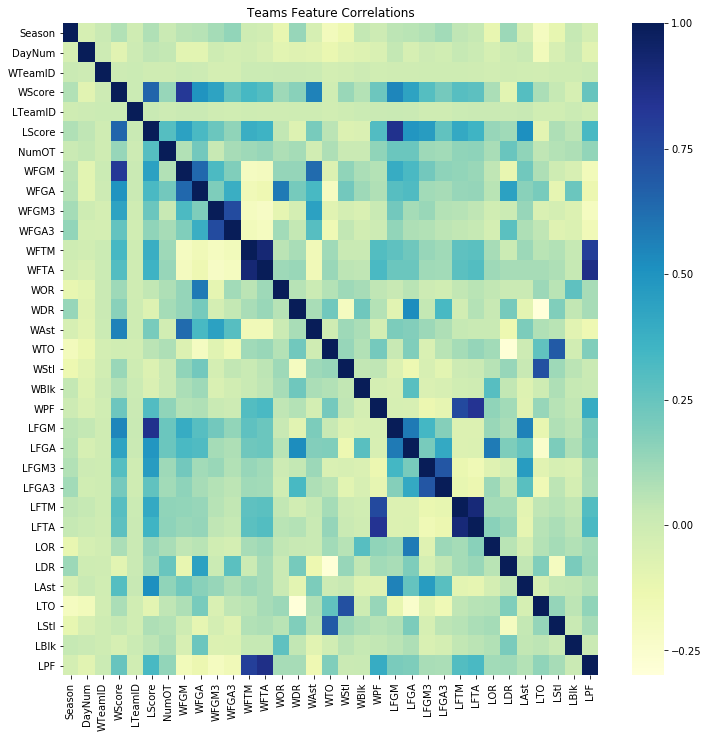

In [18]:
results = pd.read_csv('data/RegularSeasonDetailedResults.csv')
teams = pd.read_csv('data/Teams.csv')

# Get only winning teams game stats to predict their score

resultsCorr = results.corr()

plt.figure(figsize = [12, 12])
features_heat = sns.heatmap(resultsCorr, cmap="YlGnBu")
plt.title('Teams Feature Correlations')
plt.show()


In [23]:
resultsCorr['WScore'].drop('WScore')

Season     0.074132
DayNum    -0.085774
WTeamID    0.001959
LTeamID    0.005121
LScore     0.654597
NumOT      0.134976
WFGM       0.819014
WFGA       0.500755
WFGM3      0.436294
WFGA3      0.262107
WFTM       0.337335
WFTA       0.299839
WOR        0.119364
WDR        0.163479
WAst       0.560602
WTO       -0.012660
WStl       0.128359
WBlk       0.068344
WPF        0.234036
LFGM       0.546111
LFGA       0.434071
LFGM3      0.296921
LFGA3      0.214144
LFTM       0.292407
LFTA       0.276608
LOR        0.089249
LDR       -0.087814
LAst       0.296287
LTO        0.087553
LStl       0.029917
LBlk      -0.040409
LPF        0.250896
Name: WScore, dtype: float64

In [24]:
resultsCorr['LScore'].drop('WScore')

Season     0.078731
DayNum     0.041038
WTeamID   -0.009455
LTeamID    0.016037
LScore     1.000000
NumOT      0.295836
WFGM       0.442666
WFGA       0.326731
WFGM3      0.239470
WFGA3      0.151017
WFTM       0.383743
WFTA       0.360724
WOR        0.036895
WDR       -0.067995
WAst       0.203128
WTO        0.054815
WStl      -0.062199
WBlk      -0.054019
WPF        0.309164
LFGM       0.854945
LFGA       0.490513
LFGM3      0.464061
LFGA3      0.265821
LFTM       0.407556
LFTA       0.355944
LOR        0.132580
LDR        0.114681
LAst       0.517615
LTO       -0.093039
LStl       0.083180
LBlk       0.049819
LPF        0.333360
Name: LScore, dtype: float64